<a href="https://colab.research.google.com/github/GabrielSantiago97/MovieProject/blob/main/movieproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
import io
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(io.BytesIO(uploaded['IMDB-Movie-Data.csv']))

In [47]:
#OLHAR A BASE E VER O RANK ATÉ O 10°
df.head(9)

,Rank,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",Yimou Zhang,2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",Damien Chazelle,2016,128,8.3,258682,151.06,93.0
8,9,The Lost City of Z,"Action,Adventure,Biography",James Gray,2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",Morten Tyldum,2016,116,7.0,192177,100.01,41.0


In [11]:
#EXCLUIR DUAS COLUNAS QUE NÃO SERÃO USADAS
df = df.drop(columns=['Actors', 'Description'])

In [30]:
#VER AS INFORMAÇÕES SOBRE A BASE E TAMBÉM EXCLUIR VALORES NULOS
df.info()
df.dropna(axis=0, how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Director            838 non-null    object 
 4   Year                838 non-null    int64  
 5   Runtime (Minutes)   838 non-null    int64  
 6   Rating              838 non-null    float64
 7   Votes               838 non-null    int64  
 8   Revenue (Millions)  838 non-null    float64
 9   Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 72.0+ KB


In [45]:
#VER QUAIS SÃO OS ANOS QUE ESTÁ NA BASE
df_sem_duplicatas = df.drop_duplicates(subset='Year')
Anos = df_sem_duplicatas.sort_values(by='Year', ascending=True)
Anos['Year']

64    2006
75    2007
54    2008
77    2009
80    2010
45    2011
1     2012
82    2013
0     2014
50    2015
2     2016
Name: Year, dtype: int64

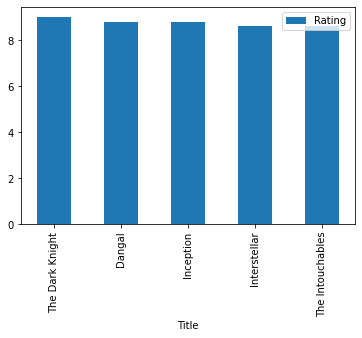

In [7]:
#CRIAR UM DASH COM BASE NAS MELHORES CLASSIFICAÇÕES DE FILMES
avalmovie = df[["Title", "Rating"]].groupby("Title").mean()	
avalmovie.sort_values(by="Rating", ascending=False).head().plot.bar()

In [12]:
#AVALIAR QUAL DIRETOR CONSEGUIU MAIS DINHEIRO COM PROJETOS (CONSIDERANDO AS INFORMAÇÕES DA BASE)
directormovie = df[["Director", "Revenue (Millions)"]].groupby("Director").sum()	
directormovie.sort_values(by="Revenue (Millions)", ascending=False).head()

,Revenue (Millions)
Director,
J.J. Abrams,1683.45
David Yates,1630.51
Christopher Nolan,1515.09
Michael Bay,1421.32
Francis Lawrence,1299.81


In [48]:
#PEGANDO BASE DA CONSULTA ANTERIOR, ANALISAR QUAIS FILMES O DIRETOR J.J.ABRAMS FEZ E QUAL DEU MAIS RENDA AO MESMO.
jjabrams = df.loc[(df['Director']=='J.J. Abrams')]
jjabrams.sort_values(by='Revenue (Millions)', ascending=True)

,Rank,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
497,498,Super 8,"Mystery,Sci-Fi,Thriller",J.J. Abrams,2011,112,7.1,298913,126.98,72.0
869,870,Mission: Impossible III,"Action,Adventure,Thriller",J.J. Abrams,2006,126,6.9,270429,133.38,66.0
362,363,Star Trek Into Darkness,"Action,Adventure,Sci-Fi",J.J. Abrams,2013,132,7.8,417663,228.76,72.0
140,141,Star Trek,"Action,Adventure,Sci-Fi",J.J. Abrams,2009,127,8.0,526324,257.70,82.0
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,2015,136,8.1,661608,936.63,81.0


In [53]:
#DESCOBRIR QUAL FILME MAIS LONGO
filmetime = df[["Title", "Runtime (Minutes)"]].groupby("Title").mean()	
filmetime.sort_values(by="Runtime (Minutes)", ascending=False).head(1)

,Runtime (Minutes)
Title,
Ma vie de Courgette,66.0


In [54]:
#DESCOBRIR QUAL FILME MAIS CURTO
filmetime.sort_values(by="Runtime (Minutes)", ascending=True).head(1)

,Runtime (Minutes)
Title,
Ma vie de Courgette,66.0
